<a href="https://colab.research.google.com/github/ezefferth/projeto-lp-2025/blob/main/TrabLP2025_Ezefferth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*  ** 1 -Iniciando instalando algumas dependências do Projeto**

In [ ]:
!pip install pandas
!pip install matplotlib

**2 - Realizando clone do git**


In [ ]:
!git clone https://github.com/facebook/react.git

Cloning into 'react'...
remote: Enumerating objects: 375462, done.
remote: Counting objects: 100% (836/836), done.
remote: Compressing objects: 100% (406/406), done.
remote: Total 375462 (delta 621), reused 453 (delta 404), pack-reused 374626 (from 3)
Receiving objects: 100% (375462/375462), 868.53 MiB | 27.28 MiB/s, done.
Resolving deltas: 100% (267620/267620), done.


**3 - Gerar um arquivo de commits com git log**

In [ ]:
!cd react && git log --pretty=format:"%an|%ad" --date=short > ../commits.txt


**4 - Processar os dados**

In [ ]:
import pandas as pd


df = pd.read_csv('commits.txt', sep='|', names=['author', 'date'])


df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna()


df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month


df.head()

,author,date,year,month
0,Jorge Cabiedes,2025-05-06,2025,5
1,Sebastian Markbåge,2025-05-06,2025,5
2,Sebastian Markbåge,2025-05-06,2025,5
3,Sebastian Markbåge,2025-05-06,2025,5
4,Matt Carroll,2025-05-05,2025,5


Total de commits e maior contribuidor global

In [ ]:
total_commits = len(df)
print(f"Total de commits desde a criação do repositório: {total_commits}")


top_author = df['author'].value_counts().idxmax()
top_author_commits = df['author'].value_counts().max()
print(f"Maior contribuidor: {top_author} ({top_author_commits} commits)")

Total de commits desde a criação do repositório: 20343
Maior contribuidor: Paul O’Shannessy (1742 commits)
Total de commits desde a criação do repositório: 20343
Maior contribuidor: Paul O’Shannessy (1742 commits)


Gráfico de commits por ano


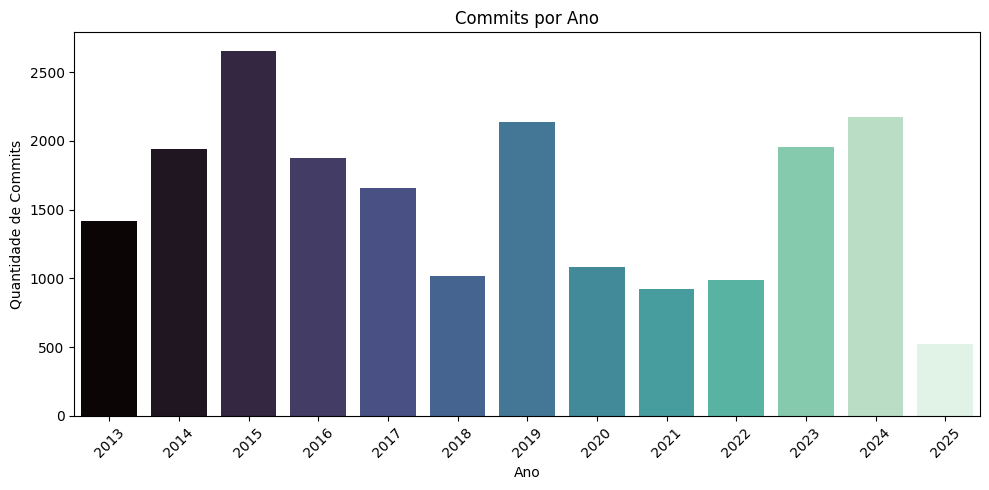

Ano com mais commits: 2015


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


commits_por_ano = df['year'].value_counts().sort_index()
ano_mais_commits = commits_por_ano.idxmax()


plt.figure(figsize=(10, 5))
sns.barplot(x=commits_por_ano.index, y=commits_por_ano.values, hue=commits_por_ano.index, palette='mako', legend=False)
plt.title("Commits por Ano")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Commits")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Ano com mais commits: {ano_mais_commits}")


Gráfico de commits por mês no ano mais ativo

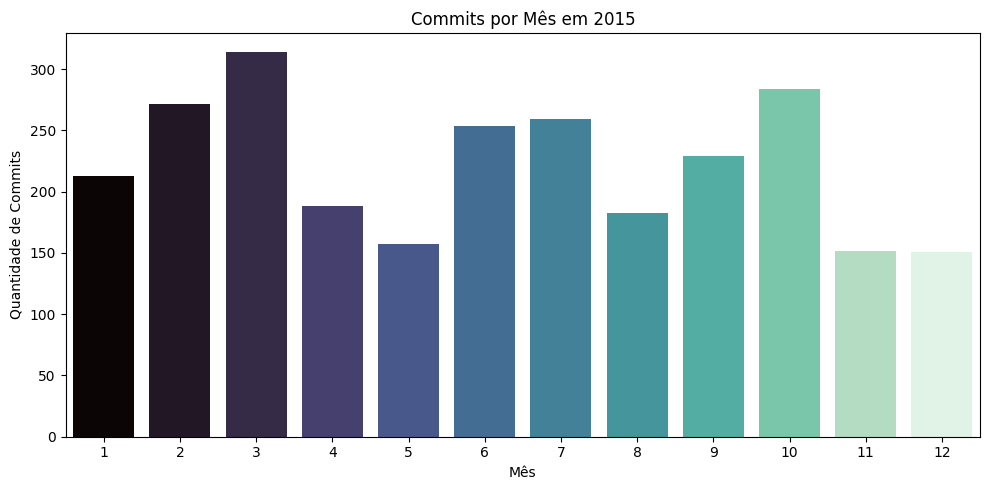

Mês com mais commits em 2015: 3


In [16]:

df_ano_top = df[df['year'] == ano_mais_commits]


commits_por_mes = df_ano_top['month'].value_counts().sort_index()
mes_mais_commits = commits_por_mes.idxmax()


plt.figure(figsize=(10, 5))
sns.barplot(x=commits_por_mes.index, y=commits_por_mes.values, hue=commits_por_mes.index, palette='mako', legend=False)
plt.title(f"Commits por Mês em {ano_mais_commits}")
plt.xlabel("Mês")
plt.ylabel("Quantidade de Commits")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"Mês com mais commits em {ano_mais_commits}: {mes_mais_commits}")


Maior contribuidor no mês mais ativo

In [15]:

df_mes_top = df_ano_top[df_ano_top['month'] == mes_mais_commits]


top_author_mes = df_mes_top['author'].value_counts().idxmax()
top_author_mes_commits = df_mes_top['author'].value_counts().max()

print(f"Maior contribuidor no mês {mes_mais_commits}/{ano_mais_commits}:")
print(f"{top_author_mes} com {top_author_mes_commits} commits")


Maior contribuidor no mês 3/2015:
Paul O’Shannessy com 83 commits
